In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/anemia.csv')

In [5]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [9]:
df.shape

(1421, 6)

In [11]:
# Display count of missing values
print("Initial Count of Missing Values in the Dataset\n")
print(df.isnull().sum())

# Handling missing values
# Fill missing numerical values with the median
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Fill missing categorical values with the mode
for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verify no missing values remain
print("\nFinal Count of Missing Values in the Dataset\n")
print(df.isnull().sum())

Initial Count of Missing Values in the Dataset

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

Final Count of Missing Values in the Dataset

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


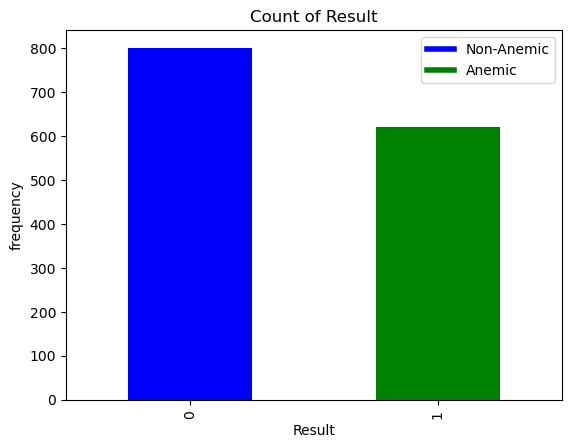

In [13]:
#checking for the count of anemia and not anemia
results = df['Result'].value_counts()
results.plot(kind = 'bar', color=['blue', 'green'])
plt.xlabel('Result')
plt.ylabel('frequency')
plt.title('Count of Result')

# Adding a legend to clarify the bar colors
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Non-Anemic')
green_patch = plt.Line2D([0], [0], color='green', lw=4, label='Anemic')
plt.legend(handles=[blue_patch, green_patch])

plt.show()

In [15]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Splitting features and target variable
X = df.drop('Result', axis=1)
y = df['Result']

# Applying SMOTETomek
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X, y)

print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

# Combine X_res and y_res into a new dataframe
df_resampled = pd.concat([X_res, y_res], axis=1)
print(df_resampled['Result'].value_counts())


Original dataset shape Counter({0: 801, 1: 620})
Resampled dataset shape Counter({0: 801, 1: 801})
Result
0    801
1    801
Name: count, dtype: int64


In [17]:
#we can see that the female count is more than the male so,
# we can balance it using the undersampling

from sklearn.utils import resample
majorclass = df[df['Result'] == 0]
minorclass = df[df['Result'] == 1]

major_downsample = resample(majorclass, replace=False, n_samples=len(minorclass), random_state=42)

df = pd.concat([major_downsample, minorclass])

print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


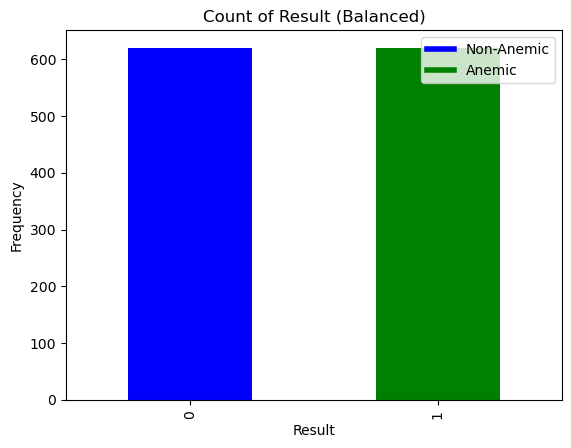

In [19]:
# Plot the balanced gender counts
result_balanced = df['Result'].value_counts()
result_balanced.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result (Balanced)')

# Adding a legend to clarify the bar colors
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Non-Anemic')
green_patch = plt.Line2D([0], [0], color='green', lw=4, label='Anemic')
plt.legend(handles=[blue_patch, green_patch])

plt.show()

In [21]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.540323,13.218145,22.903952,30.277984,85.620968,0.500000
std,0.498573,1.976190,3.993624,1.394515,9.673794,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.100000,77.300000,0.000000
50%,1.000000,13.000000,22.700000,30.400000,85.300000,0.500000
75%,1.000000,14.900000,26.200000,31.500000,94.225000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


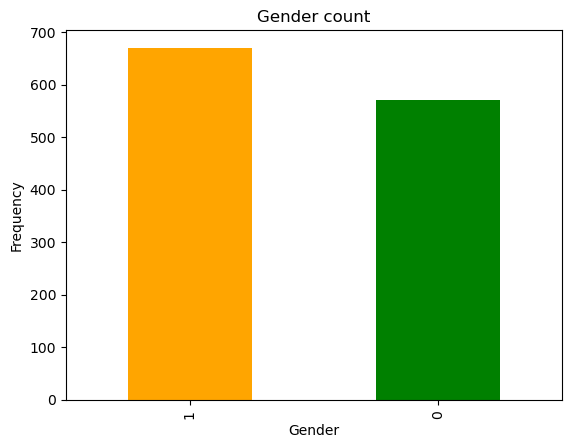

In [23]:
# Univariate Analysis

output = df['Gender'].value_counts()
output.plot(kind = 'bar', color=['orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender count')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


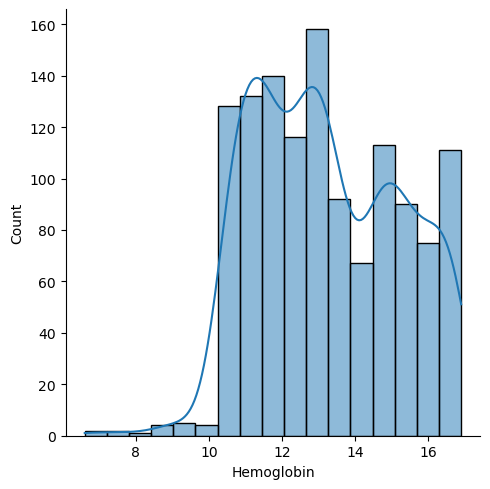

In [25]:
# Univariate Analysis

sns.displot(df['Hemoglobin'], kde = True)

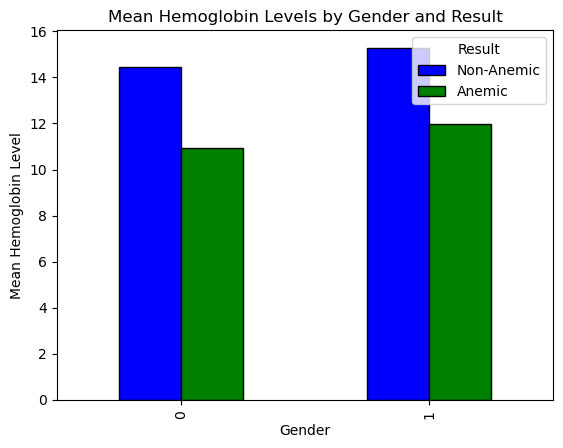

In [27]:
# Bivariate Analysis
 
# Calculate mean hemoglobin levels grouped by gender and result
mean_hemoglobin = df.groupby(['Gender', 'Result'])['Hemoglobin'].mean().reset_index()

# Pivot the data to get a format suitable for plotting
mean_hemoglobin_pivot = mean_hemoglobin.pivot(index='Gender', columns='Result', values='Hemoglobin')

# Plot the histogram
mean_hemoglobin_pivot.plot(kind='bar', color=['blue', 'green'], edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Mean Hemoglobin Level')
plt.title('Mean Hemoglobin Levels by Gender and Result')
plt.legend(title='Result', labels=['Non-Anemic', 'Anemic'])
plt.show()


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

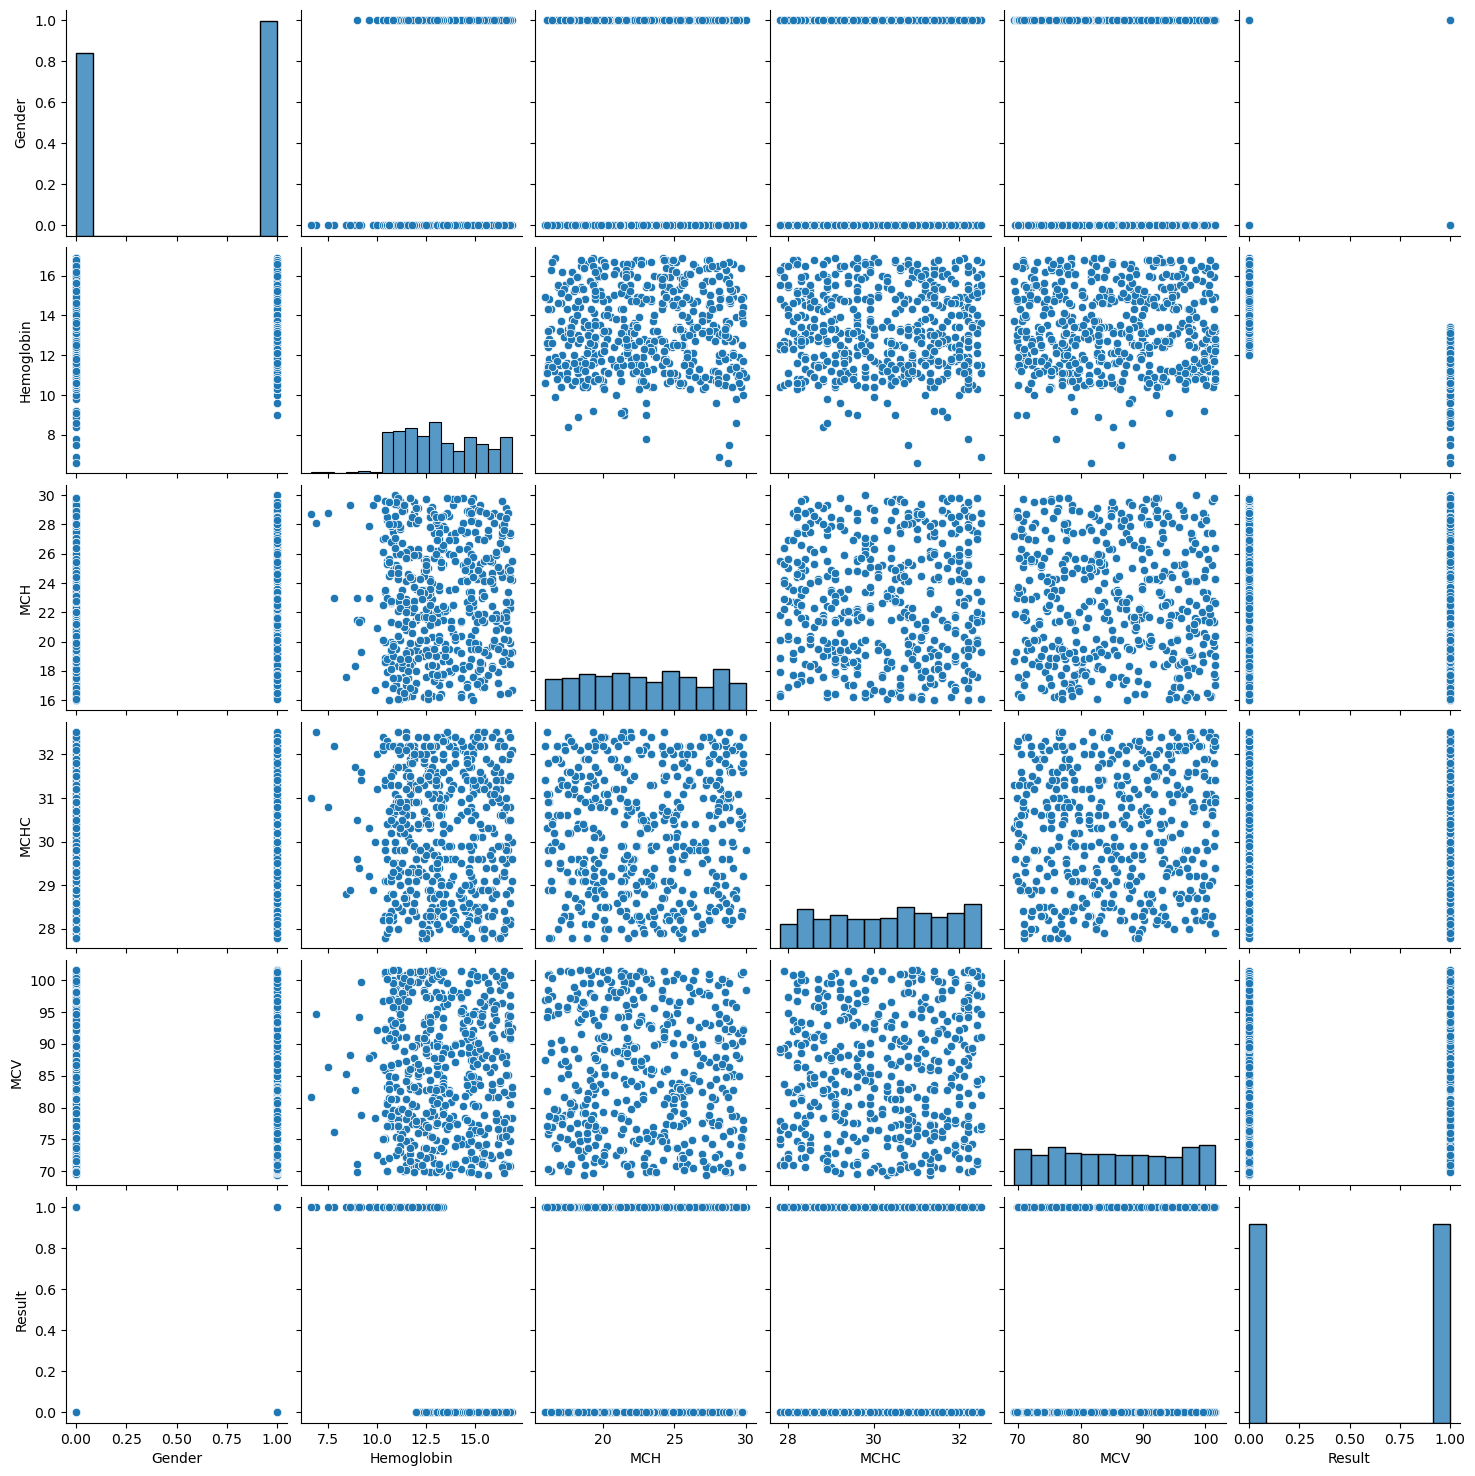

In [29]:
# Multivariate Analysis

# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (if any)
df.dropna(inplace=True)

# Now plot the pairplot
sns.pairplot(df)
plt.show()

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object
Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


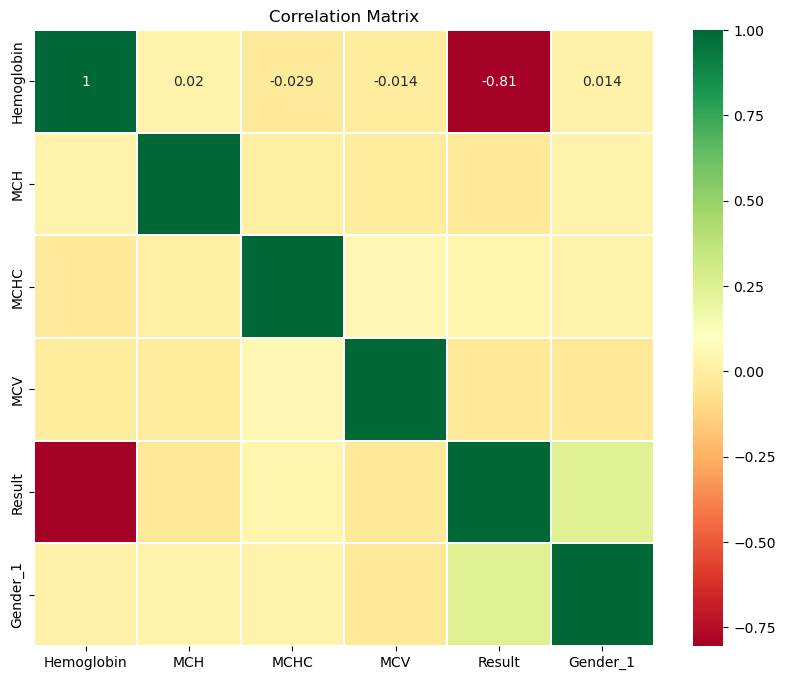

In [31]:
# Multivariate Analysis

print(df.dtypes)

df = df.apply(pd.to_numeric, errors='coerce')

print(df.isnull().sum())
df = df.dropna()  # or use an appropriate imputation method

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

In [33]:
X = df.drop('Result',axis = 1)
X

,Hemoglobin,MCH,MCHC,MCV,Gender_1
1234,16.6,18.8,28.1,70.9,True
1188,15.3,18.3,30.4,93.4,False
106,14.8,20.4,28.5,91.1,False
954,14.6,16.9,31.9,78.1,False
112,15.9,28.7,31.0,81.6,False
...,...,...,...,...,...
1415,13.2,20.1,28.8,91.2,True
1416,10.6,25.4,28.2,82.9,False
1417,12.1,28.3,30.4,86.9,True
1418,13.1,17.7,28.1,80.7,True


In [35]:
Y = df['Result']
Y

1234    0
1188    0
106     0
954     0
112     0
       ..
1415    1
1416    1
1417    1
1418    1
1420    1
Name: Result, Length: 1240, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


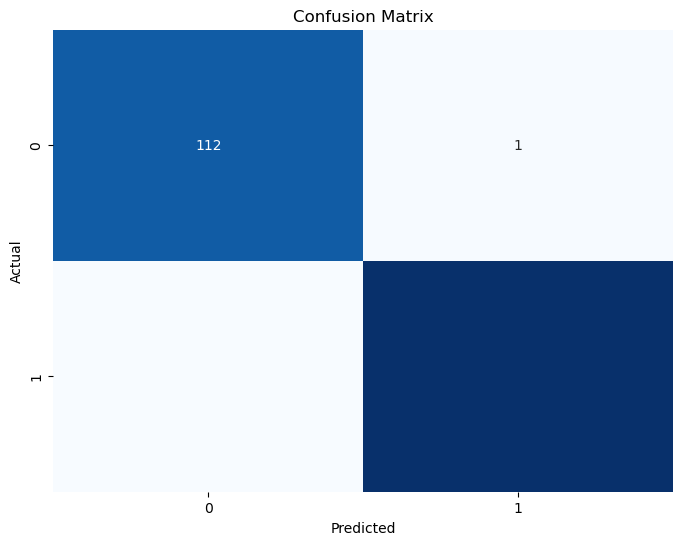

Accuracy Score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       113
           1       0.99      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

Cross-validation Scores: [0.97487437 0.98492462 0.97979798 0.98484848 0.99494949]


In [41]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

logistic_regression = LogisticRegression(C=1.0, class_weight='balanced', solver='liblinear', random_state=42)
logistic_regression.fit(x_train_scaled, y_train)

y_pred = logistic_regression.predict(x_test_scaled)

acc_lr = accuracy_score(y_test, y_pred)
c_lr = classification_report(y_test, y_pred)
cm_lr = confusion_matrix(y_test, y_pred)

cv_scores = cross_val_score(logistic_regression, x_train_scaled, y_train, cv=5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Accuracy Score: {:.2f}'.format(acc_lr))
print('Classification Report:\n', c_lr)
print('Cross-validation Scores:', cv_scores)

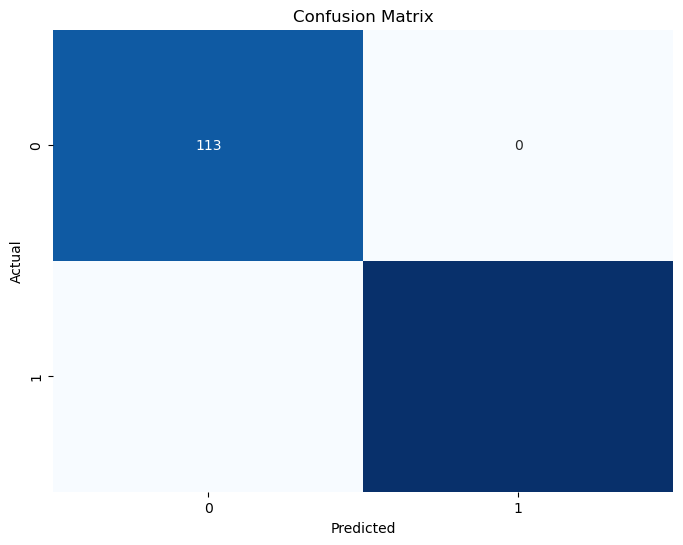

Accuracy Score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

Cross-validation Scores: [1. 1. 1. 1. 1.]


In [43]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train_scaled, y_train)

y_pred = random_forest.predict(x_test_scaled)

acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)

cv_scores = cross_val_score(random_forest, x_train_scaled, y_train, cv=5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Accuracy Score: {:.2f}'.format(acc_rf))
print('Classification Report:\n', c_rf)
print('Cross-validation Scores:', cv_scores)

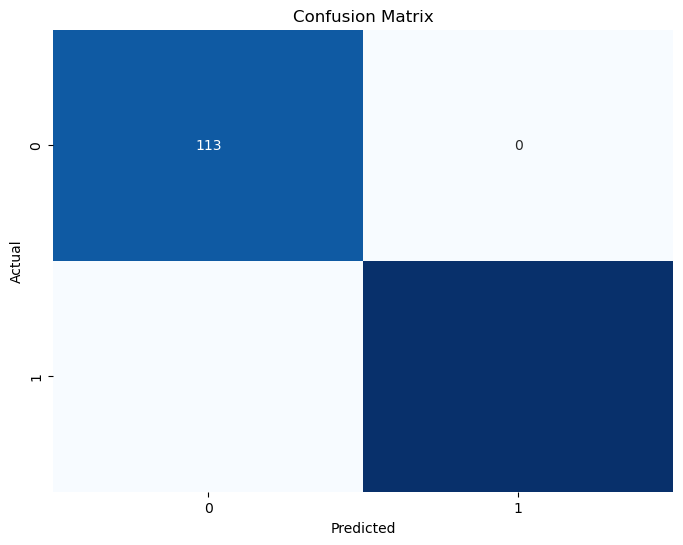

Accuracy Score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

Cross-validation Scores: [1. 1. 1. 1. 1.]


In [45]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_train_scaled, y_train)

y_pred = decision_tree_model.predict(x_test_scaled)

acc_dt = accuracy_score(y_test, y_pred)
c_dt = classification_report(y_test, y_pred)
cm_dt = confusion_matrix(y_test, y_pred)

cv_scores = cross_val_score(decision_tree_model, x_train_scaled, y_train, cv=5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Accuracy Score: {:.2f}'.format(acc_dt))
print('Classification Report:\n', c_dt)
print('Cross-validation Scores:', cv_scores)

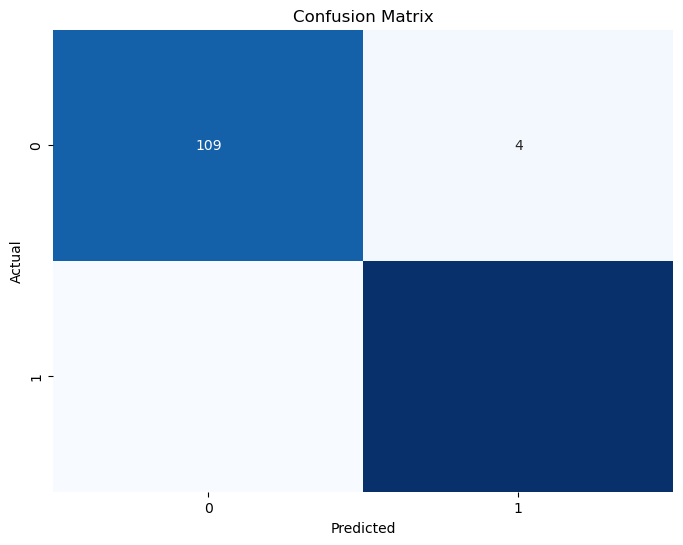

Accuracy Score: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.97      0.99      0.98       135

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248

Cross-validation Scores: [0.92964824 0.96482412 0.9040404  0.92929293 0.93434343]


In [47]:
# Naive Bayes 

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

NB = GaussianNB()
NB.fit(x_train_scaled, y_train)

y_pred = NB.predict(x_test_scaled)

acc_nb = accuracy_score(y_test, y_pred)
c_nb = classification_report(y_test, y_pred)
cm_nb = confusion_matrix(y_test, y_pred)

cv_scores = cross_val_score(NB, x_train_scaled, y_train, cv=5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Accuracy Score: {:.2f}'.format(acc_nb))
print('Classification Report:\n', c_nb)
print('Cross-validation Scores:', cv_scores)

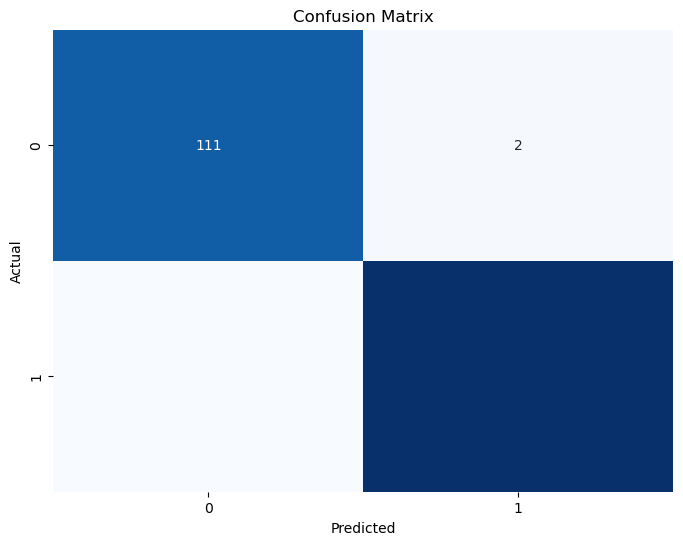

Accuracy Score: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.99      1.00      0.99       135

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248

Cross-validation Scores: [0.96984925 0.97487437 0.97474747 0.97979798 0.98484848]


In [49]:
# SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

support_vector = SVC(kernel='rbf', random_state=42)
support_vector.fit(x_train_scaled, y_train)

y_pred = support_vector.predict(x_test_scaled)

acc_svc = accuracy_score(y_test, y_pred)
c_svc = classification_report(y_test, y_pred)
cm_svc = confusion_matrix(y_test, y_pred)

cv_scores = cross_val_score(support_vector, x_train_scaled, y_train, cv=5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Accuracy Score: {:.2f}'.format(acc_svc))
print('Classification Report:\n', c_svc)
print('Cross-validation Scores:', cv_scores)

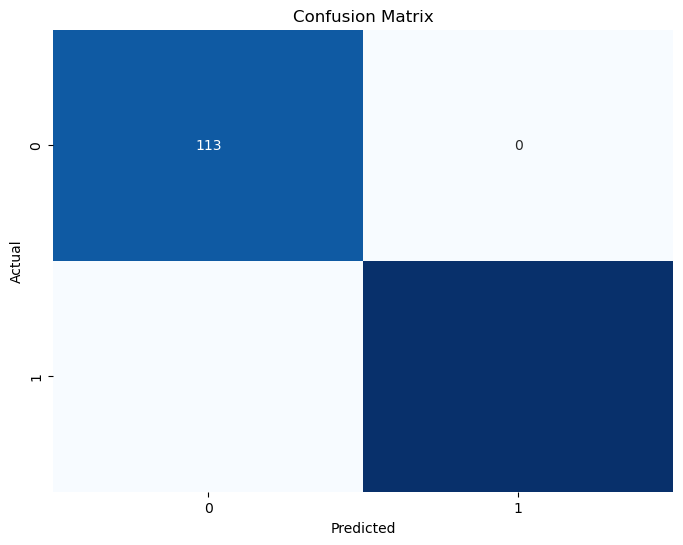

Accuracy Score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

Cross-validation Scores: [1. 1. 1. 1. 1.]


In [51]:
# Graidient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

GBC = GradientBoostingClassifier(n_estimators=100, random_state=42)
GBC.fit(x_train_scaled, y_train)

y_pred = GBC.predict(x_test_scaled)

acc_gbc = accuracy_score(y_test, y_pred)
c_gbc = classification_report(y_test, y_pred)
cm_gbc = confusion_matrix(y_test, y_pred)

cv_scores = cross_val_score(GBC, x_train_scaled, y_train, cv=5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Accuracy Score: {:.2f}'.format(acc_gbc))
print('Classification Report:\n', c_gbc)
print('Cross-validation Scores:', cv_scores)

In [53]:
model = pd.DataFrame({'Model':['Linear Regression', 'Decision Tree Classifier', 'RandomForest Classifier',
                               'Gaussian Naive Bayes', 'Support Vector Classifier', 'Gradient Boost Classifier'],
                      'Score':[acc_lr,acc_dt,acc_rf,acc_nb,acc_svc,acc_gbc],
                     })

In [55]:
model

,Model,Score
0,Linear Regression,0.995968
1,Decision Tree Classifier,1.000000
2,RandomForest Classifier,1.000000
3,Gaussian Naive Bayes,0.979839
4,Support Vector Classifier,0.991935
5,Gradient Boost Classifier,1.000000


In [57]:
# Saving the best model

import os
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import pickle

def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted')
    }

models = [
    ('Logistic Regression', logistic_regression),
    ('Random Forest', random_forest),
    ('Decision Tree', decision_tree_model),
    ('Naive Bayes', NB),
    ('SVM', support_vector),
    ('Gradient Boosting', GBC)
]

results = []
for name, model in models:
    y_pred = model.predict(x_test_scaled)
    metrics = calculate_metrics(y_test, y_pred)
    cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='accuracy')
    metrics['cv_score'] = cv_scores.mean()
    results.append((name, metrics))

df_results = pd.DataFrame([(name, *metrics.values()) for name, metrics in results],
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Score'])

df_results = df_results.sort_values('CV Score', ascending=False).reset_index(drop=True)

print(df_results)

best_model_name = df_results.iloc[0]['Model']
best_model = next(model for name, model in models if name == best_model_name)

# Specify the directory where you want to save the model
save_directory = os.path.expanduser('C:/Users/Vansh Payala/OneDrive/Desktop')  # This saves to the "Downloads" folder of the current user
os.makedirs(save_directory, exist_ok=True)
save_path = os.path.join(save_directory, 'best_anemia_model.pkl')

# Save the model to the specified path
with open(save_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model ({best_model_name}) saved as '{save_path}'")

                 Model  Accuracy  Precision    Recall  F1 Score  CV Score
0        Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
1        Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
2    Gradient Boosting  1.000000   1.000000  1.000000  1.000000  1.000000
3  Logistic Regression  0.995968   0.995997  0.995968  0.995966  0.983879
4                  SVM  0.991935   0.992053  0.991935  0.991929  0.976824
5          Naive Bayes  0.979839   0.980079  0.979839  0.979814  0.932430
Best model (Random Forest) saved as 'C:/Users/Vansh Payala/OneDrive/Desktop\best_anemia_model.pkl'


In [59]:
import pickle

with open("best_anemia_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [61]:
# Example prediction
example_prediction = loaded_model.predict([[0, 11.6, 22.3, 30.9, 74.5]])
print('Example Prediction:', example_prediction)

Example Prediction: [1]
